# Projeto de Filtros - Emanuel SA

## Caracterísitcas dos Filtros

Serão feitos filtros para duas frequências, um passa baixa para filtrar áudio de alta frequência (acima da vocalização humana) e um passa alta para bloquear interferência de baixa frequência em um amplificador AC de ~2 kHz. Um filtro FIR e outro IIR serão feitos para cada frequência. Assim, temos a seguinte tabela de valores para os filtros:

|IR |Tipo|$f_c$ (kHz)|$\omega_c$ (k rad/s)|
|---|----|-----------|--------------------|
|FIR|PB  |2          |$4\pi$              |
|IIR|PB  |2          |$4\pi$              |
|FIR|PA  |0.5        |$\pi$               |
|IIR|PA  |0.5        |$\pi$               |

Analisando as características dos sinais e seus contextos, podemos também decidir a ordem do filtro. Ambos os filtros podem ter uma ordem relativamente pequena (~3 ou 4) devido à grande separação entre a frequência do sinal e a do ruído que queremos isolar.

Também temos que o filtro PB deve ter um atraso de grupo mais consistente entre as frequências eum ripple pequeno ($δ \le 5\%$), já que um espalhamento do sinal ou um volume inconsitente pode tornar a fala irritante ou incompreensível.

In [1]:
import matplotlib.pyplot as plt
import scipy.signal as sp

import numpy as np

import DSP

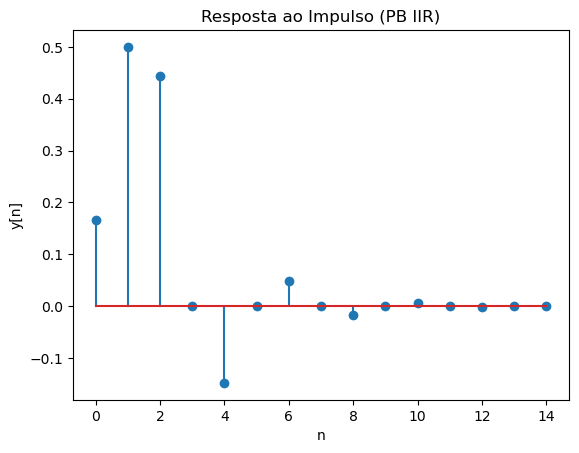

<Figure size 640x480 with 0 Axes>

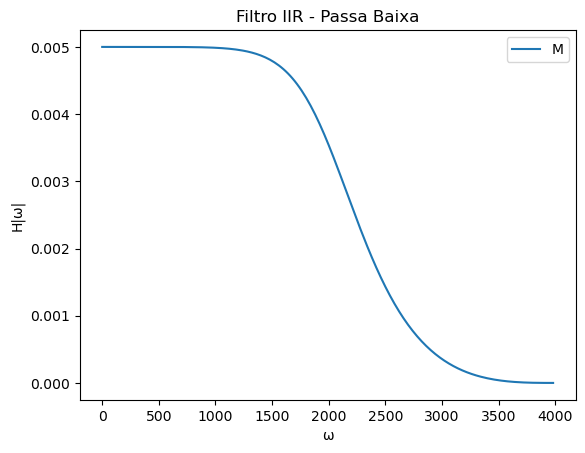

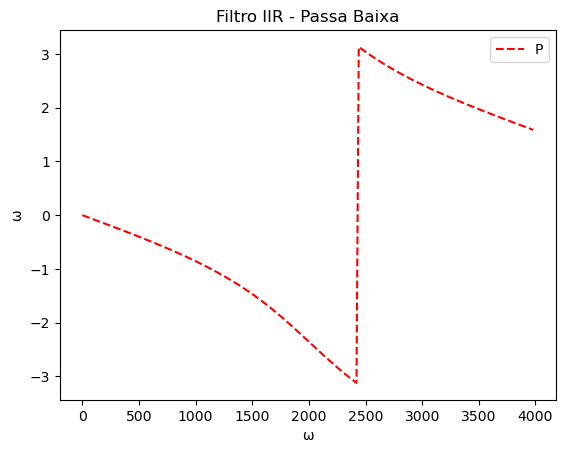

In [2]:
# Projeto do filtro PB IIR
fcB = 2e3   # Analógica
fs  = 8e3   # Sampling
[b_PBI, a_PBI] =sp.butter(3, fcB, fs=fs)
# Resposta ao impulso
x = np.zeros(400)
x[0] = 1
h_PBI = sp.lfilter(b_PBI, a_PBI, x)
nf = 15 # n em que o sinal aproxima 0
DSP.plot([h_PBI[0:nf], np.arange(0, nf)], title="Resposta ao Impulso (PB IIR)")
DSP.plot_FFT(h_PBI, type= "Separate", T=1/fs, title="Filtro IIR - Passa Baixa")


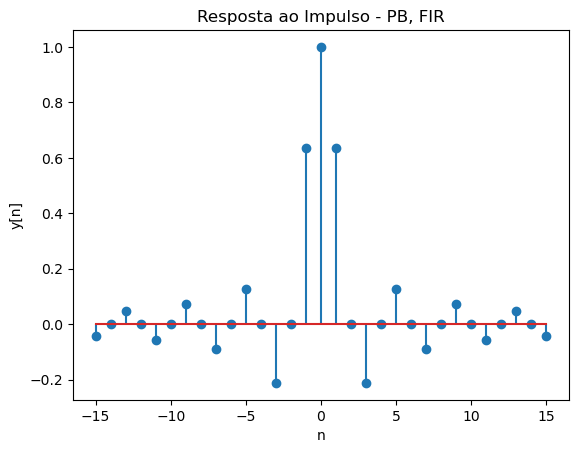

<Figure size 640x480 with 0 Axes>

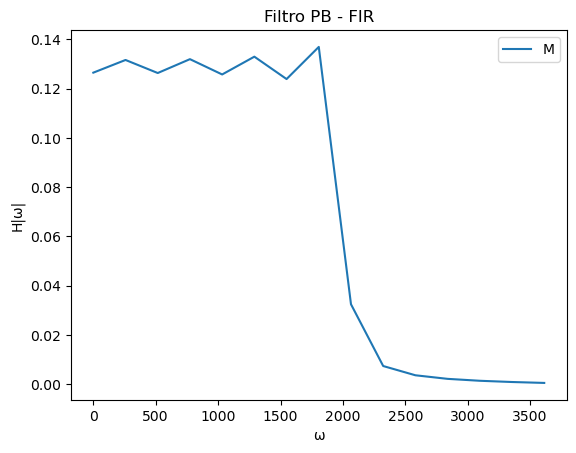

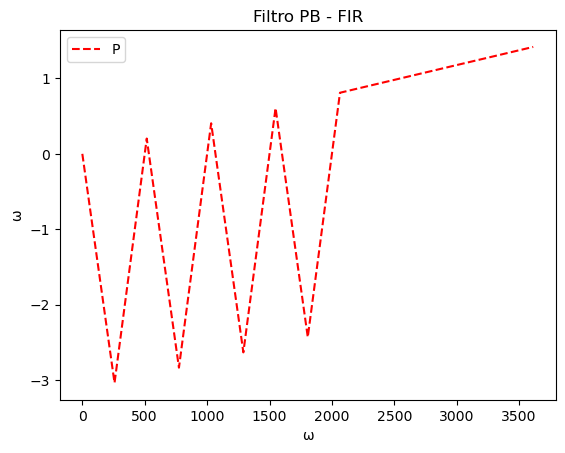

In [3]:
# Projeto do filtro PB - FIR
wc    = 2*fcB/fs # Frequência Digital /pi
n0    = 15
n     = np.arange(-n0, n0+1)
h_PBF = np.sinc(wc*n) # Multiplica frequêcia por pi
DSP.plot([h_PBF, n], "Resposta ao Impulso - PB, FIR")
DSP.plot_FFT(h_PBF, type= "Separate", T=1/fs, title="Filtro PB - FIR")

Para pegar os coeficientes b do filtro, podemos simplesmente fazer $b[n] = h[n]$ e a = [1]

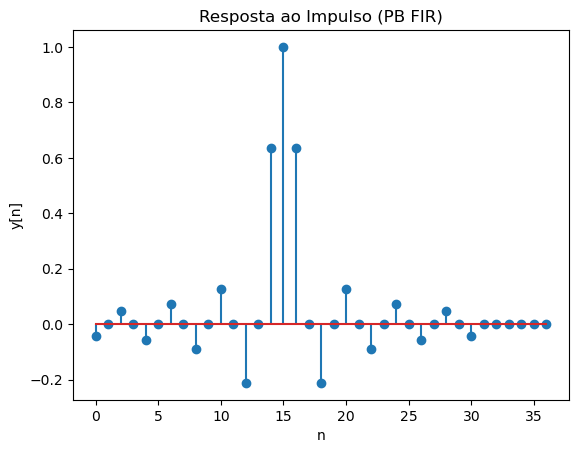

In [4]:
# Aplicando filtro
a_PBF = np.array([1])
b_PBF = h_PBF # Filtro de ordem 30
# Resposta ao ipulso do filtro
x = np.zeros(37)
x[0] = 1
h_PBI = sp.lfilter(b_PBF, a_PBF, x)
nf = 15 # n em que o sinal aproxima 0
DSP.plot([h_PBI, np.arange(0, 37)], title="Resposta ao Impulso (PB FIR)")

c:\Users\emanuel\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


δ =  [0.007, -0.006]
δ = ± 0.007
δ =   5.04 %


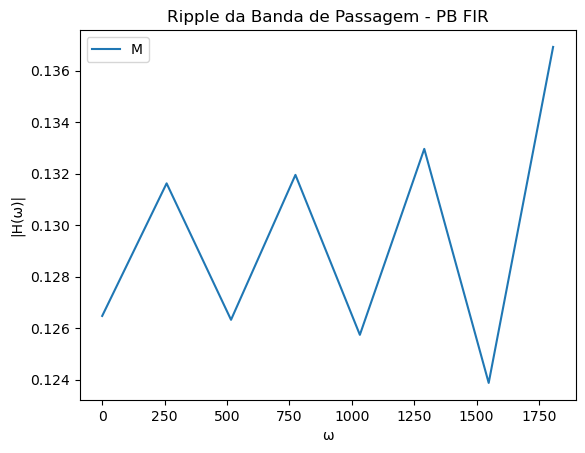

In [5]:
# Ripple de frequência
F_PBF = np.array(DSP.get_FFT(h_PBF, 1/fs))
Η     = F_PBF[0][(F_PBF[1] < fcB)]
Φ     = F_PBF[1][(F_PBF[1] < fcB)]
F_BP  = [Η, Φ] # Banda de Passagem
F_mean = np.mean(np.abs(Η))
F_max = np.max(np.abs(Η))
F_min = np.min(np.abs(Η))
DSP.Plot_Fourier(F_BP, title="Ripple da Banda de Passagem - PB FIR")
# Ripple Máximo em Valores Absolutos e Relativo
print("δ = ", [np.round(F_max - F_mean, 3), np.round(F_min - F_mean, 3)])
print("δ = ±", np.round((F_max-F_min)/2, 3))
print("δ =  ", np.round(50*(F_max-F_min)/F_mean, 3), "%")

In [6]:
ripple = np.max(np.abs(Η)) - np.min(np.abs(Η))
print("Ripple de Banda de Passagem: ", round(ripple, 4),
       " (", round(100*ripple/np.max(np.abs(Η)), 4), "% )")

Ripple de Banda de Passagem:  0.0131  ( 9.5317 % )


O ripple observado não deve ser alto o suficiente para causar problemas, portanto o filtro é aceitável

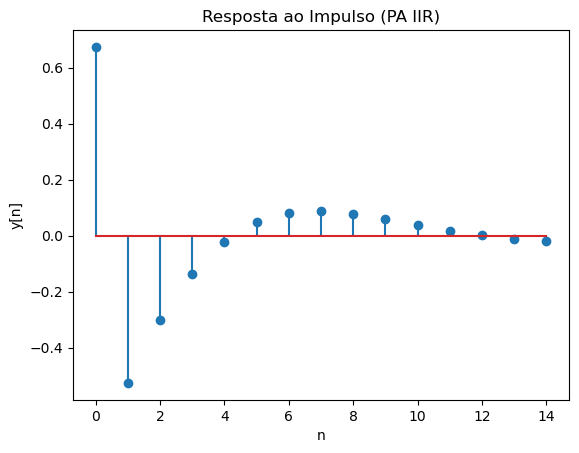

<Figure size 640x480 with 0 Axes>

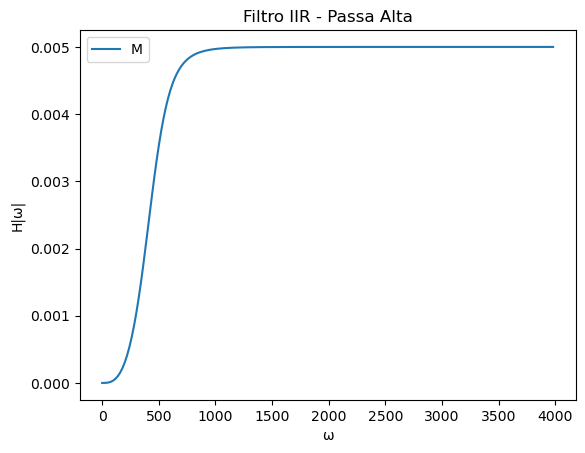

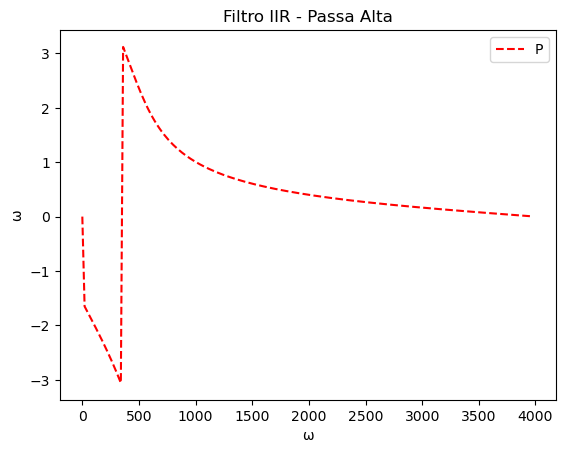

In [7]:
# Filtro Passa Alta - IIR
fcA = 500
[b_PAI, a_PAI] = sp.butter(3, fcA, "hp", fs=fs)
x = np.zeros(400)
x[0] = 1
h_PAI = sp.lfilter(b_PAI, a_PAI, x)
nf = 15 # n em que o sinal aproxima 0
DSP.plot([h_PAI[0:nf], np.arange(0, nf)], title="Resposta ao Impulso (PA IIR)")
DSP.plot_FFT(h_PAI, type= "Separate", T=1/fs, title="Filtro IIR - Passa Alta")

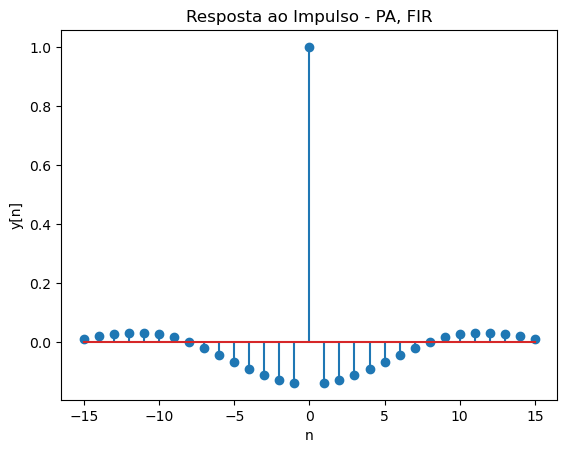

<Figure size 640x480 with 0 Axes>

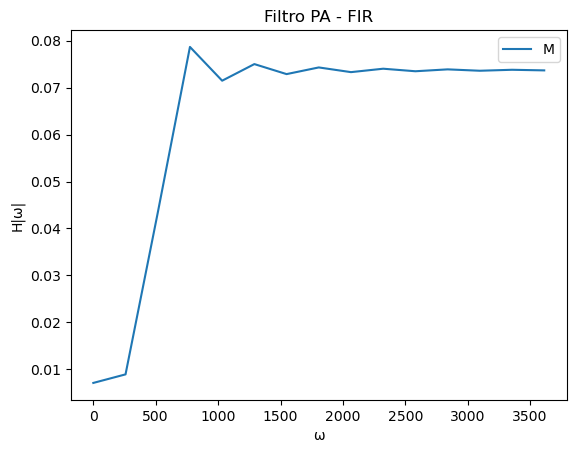

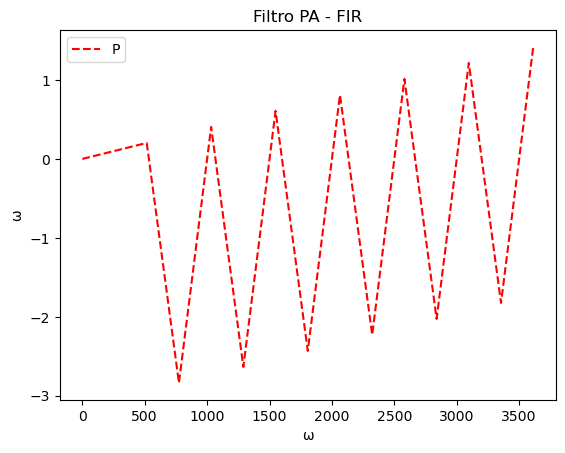

In [8]:
# Projeto do filtro PA - FIR
fcA   = 500
fcN   = (fs/2) - fcA # Espelhamento de Espectro
wc    = 2*fcN/fs
n0    = 15
n     = np.arange(-n0, n0+1)
N     = len(n)-1
h_PAF = ((-1.0)**n)*np.sinc(wc*n)
DSP.plot([h_PAF, n], "Resposta ao Impulso - PA, FIR")
DSP.plot_FFT(h_PAF, type= "Separate", T=1/fs, title="Filtro PA - FIR")

δ =  [0.005, -0.003]
δ = ± 0.004
δ =   4.863 %


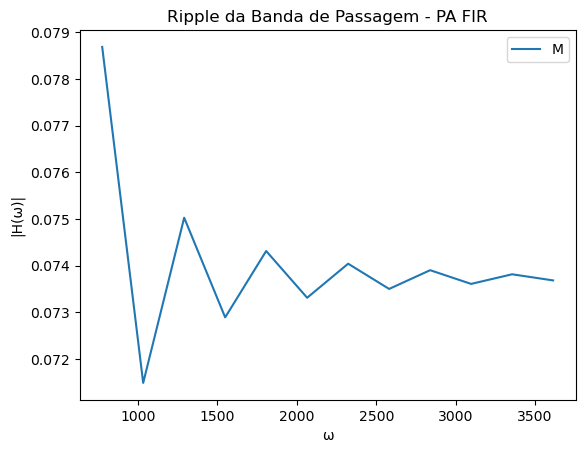

In [9]:
# Ripple de frequência
F_PAF = np.array(DSP.get_FFT(h_PAF, 1/fs))
Η     = F_PAF[0][(F_PAF[1] > (fcA+30))] # >fc começa muito cedo, tornando análise menos confiável
Φ     = F_PAF[1][(F_PAF[1] > (fcA+30))] # >fc começa muito cedo, tornando análise menos confiável
F_BP  = [Η, Φ] # Banda de Passagem
F_mean = np.mean(np.abs(Η))
F_max = np.max(np.abs(Η))
F_min = np.min(np.abs(Η))
DSP.Plot_Fourier(F_BP, title="Ripple da Banda de Passagem - PA FIR")
# Ripple Máximo em Valores Absolutos e Relativo
print("δ = ", [np.round(F_max - F_mean, 3), np.round(F_min - F_mean, 3)])
print("δ = ±", np.round((F_max-F_min)/2, 3))
print("δ =  ", np.round(50*(F_max-F_min)/F_mean, 3), "%")

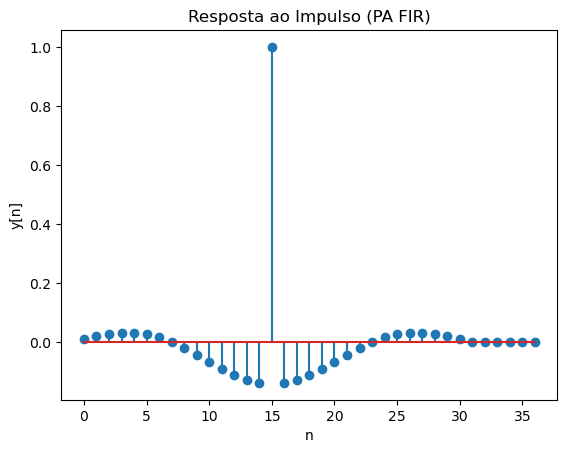

In [10]:
# Aplicando filtro
a_PAF = np.array([1])
b_PAF = h_PAF # Filtro de ordem 30
# Resposta ao impulso do filtro
x = np.zeros(37)
x[0] = 1
h_PBI = sp.lfilter(b_PAF, a_PAF, x)
nf = 15 # n em que o sinal aproxima 0
DSP.plot([h_PBI, np.arange(0, 37)], title="Resposta ao Impulso (PA FIR)")

Podemos ver que os filtros FIR possuem fase linearmente dependente à frequência, conforme desejado na fase inicial do projeto, enquanto os filtros IIR possuem fase não linear e, portanto, atraso de grupo não constante.

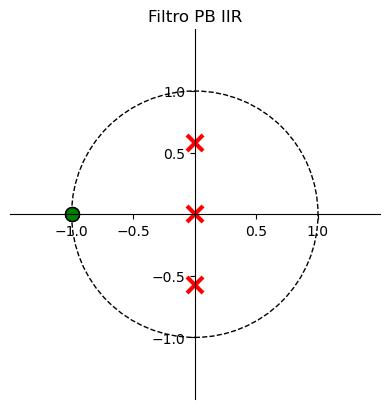

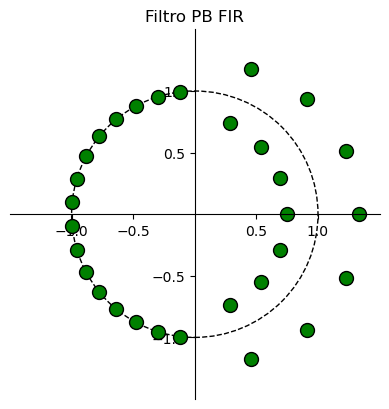

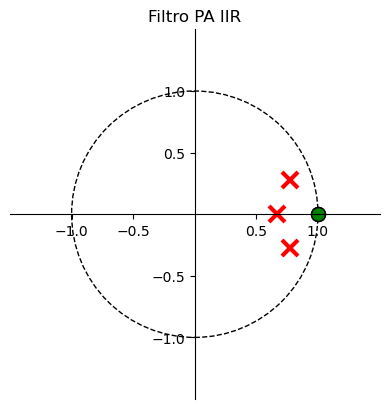

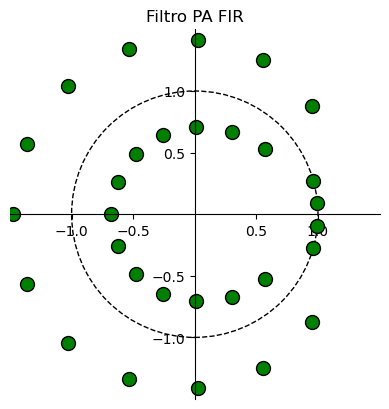

------------------------------------------------
Filtro PB - IIR
       0.167 + 0.5z^-1 + 0.5z^-2 + 0.167z^-3
H(z) = -------------------------------------
       1.0 + 0.333z^-2
------------------------------------------------
Filtro PB - FIR
       -0.042 + 0.049z^-2 + -0.058z^-4 + 0.071z^-6 + -0.091z^-8 + 0.127z^-10 + -0.212z^-12 + 0.637z^-14 + 1.0z^-15 + 0.637z^-16 + -0.212z^-18 + 0.127z^-20 + -0.091z^-22 + 0.071z^-24 + -0.058z^-26 + 0.049z^-28 + -0.042z^-30
H(z) = -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
       1
------------------------------------------------
Filtro PA - FIR
       0.009 + 0.018z^-1 + 0.026z^-2 + 0.03z^-3 + 0.031z^-4 + 0.026z^-5 + 0.015z^-6 + -0.02z^-8 + -0.043z^-9 + -0.067z^-10 + -0.091z^-11 + -0.112z^-12 + -0.129z^-13 + -0.139z^-14 + 1.0z^-15 + -0.139z^-16 + -0.129z^-17 + -0.112z^-18 + -0.

In [11]:
## Limpa coeficientes
a_PBI[np.abs(a_PBI) < 1e-6] = 0
b_PBI[np.abs(b_PBI) < 1e-6] = 0
a_PBF[np.abs(a_PBF) < 1e-6] = 0
b_PBF[np.abs(b_PBF) < 1e-6] = 0
a_PAI[np.abs(a_PAI) < 1e-6] = 0
b_PAI[np.abs(b_PAI) < 1e-6] = 0
a_PAF[np.abs(a_PAF) < 1e-6] = 0
b_PAF[np.abs(b_PAF) < 1e-6] = 0
## Diagramas de polos e zeros
DSP.zplane(b_PBI, a_PBI, title="Filtro PB IIR")
DSP.zplane(b_PBF, a_PBF, title="Filtro PB FIR")
DSP.zplane(b_PAI, a_PAI, title="Filtro PA IIR")
DSP.zplane(b_PAF, a_PAF, title="Filtro PA FIR")
## Equações de Transferência
print("------------------------------------------------")
print("Filtro PB - IIR")
DSP.print_Hz(b_PBI, a_PBI)
print("------------------------------------------------")
print("Filtro PB - FIR")
DSP.print_Hz(b_PBF, a_PBF)
###
print("------------------------------------------------")
print("Filtro PA - FIR")
DSP.print_Hz(b_PAF, a_PAF)
print("------------------------------------------------")
print("Filtro PA - IIR")
DSP.print_Hz(b_PAI, a_PAI)
print("------------------------------------------------")

## Observações

Como a frequência de corte dos filtros PB se encontram no meio da frequência de Nyquist, podemos ver que para o filtro FIR metade dos zeros se encontram em uma metade do círculo unitário e a outra metade dos zeros está "costurando" a outra metade do círculo; também podemos ver um comportamento parecido no filtro PA, a diferença sendo que os zeros no círuclo unitário são ~12.5% do total ($500=0.125\cdot 4k$). Para fase linear, todos os zeros seguem o padrão $z=1$, $z=a$, $z=1/a$, $z=z^*$ e $z=1/z^*$.

Para os filtros IIR, podemos observar o comportamento comum de filtros butterworth, em que todos os polos se encontram em um círculo menor que o raio unitário mais um polo real. O polo real vem do filtro ter sido projetado para ordens pares, e para criar um filtro de ordem ímpar um polo real é adicionado na saída do filtro par.

Os polos em zero dos filtros butterworth parecem estranhos a primeira vista, dado que há um termo independente no polinômio característico da função de transferência, mas isso se deve à escrita usual do polinômio: $H(z)=\dfrac{num}{z^3+0.333z^1}$, onde há de fato um polo em z=0. Seguindo a mesma ideia, temos que os filtros FIR possuem n polos na origiem, uma vez que possuem a equação $\dfrac{num}{z^{30}}$.

c:\Users\emanuel\Documents\Projects\Misc\DSP\DSP.py:596: UserWarning: The filter's denominator is extremely small at frequencies [0.000],             around which a singularity may be present
  w, gd = sp.signal.group_delay((b, a), fs=fs)


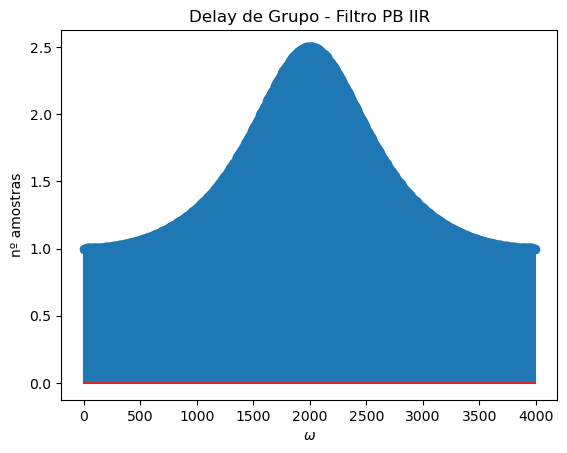

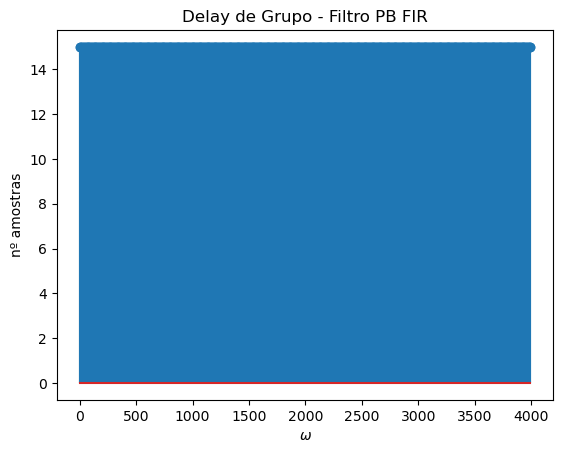

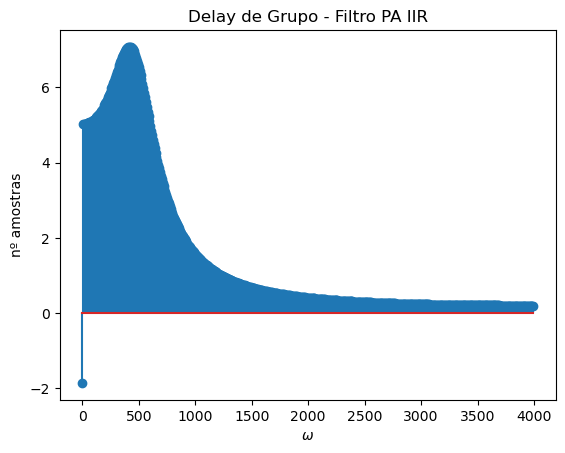

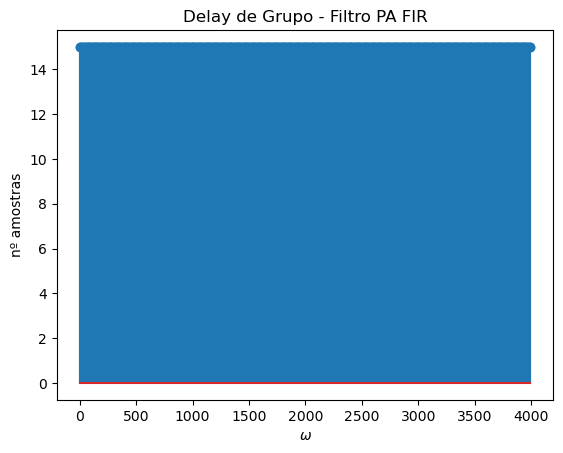

In [12]:
## Atraso de grupo dos filtros
DSP.plot_group_delay(b_PBI, a_PBI, fs=fs, title="Delay de Grupo - Filtro PB IIR")
DSP.plot_group_delay(b_PBF, a_PBF, fs=fs, title="Delay de Grupo - Filtro PB FIR")
DSP.plot_group_delay(b_PAI, a_PAI, fs=fs, title="Delay de Grupo - Filtro PA IIR")
DSP.plot_group_delay(b_PAF, a_PAF, fs=fs, title="Delay de Grupo - Filtro PA FIR")

O delay de grupo para o filtro passa alta IIR parece ter um erro, em que $\omega=0$ produz um avanço de ~2 amostras no sinal, este efeito não é observado na resposta do filtro, e como está fora de sua banda de passagem, não deve impactar o resultado

In [13]:
# Número de Multiplicações
## Filtros em Cascata
## Normais
sos_PBI = sp.tf2sos(b_PBI, a_PBI)
sos_PBF = sp.tf2sos(b_PBF, a_PBF)
sos_PAI = sp.tf2sos(b_PAI, a_PAI)
sos_PAF = sp.tf2sos(b_PAF, a_PAF)
##
print("Número de multiplicações (PB IIR):")
print("- Formas diretas: ",len(b_PBI)+len(a_PBI)-1)
print("- Forma cascata: ", len(sos_PBI)*5)

print("Número de multiplicações (PB FIR):")
print("- Formas diretas: ",len(b_PBF)+len(a_PBF)-1)
print("- Forma cascata: ", len(sos_PBF)*5)

print("Número de multiplicações (PA IIR):")
print("- Formas diretas: ",len(b_PAI)+len(a_PAI)-1)
print("- Forma cascata: ", len(sos_PAI)*5)

print("Número de multiplicações (PA FIR):")
print("- Formas diretas: ",len(b_PAF)+len(a_PAF)-1)
print("- Forma cascata: ", len(sos_PAF)*5)

Número de multiplicações (PB IIR):
- Formas diretas:  7
- Forma cascata:  10
Número de multiplicações (PB FIR):
- Formas diretas:  31
- Forma cascata:  75
Número de multiplicações (PA IIR):
- Formas diretas:  7
- Forma cascata:  10
Número de multiplicações (PA FIR):
- Formas diretas:  31
- Forma cascata:  75


## Tabela de Comparação dos Filtros
|Filtro|Ordem|nº de Multiplicações - Direta|nº de Multiplicações - Cascata|
|------|:---:|:---------------------------:|:----------------------------:|
|PA IIR|$3$  |$7$                          |$10$                          |
|PA FIR|$30$ |$31$                         |$75$                          |
|PF IIR|$3$  |$7$                          |$10$                          |
|PF FIR|$30$ |$31$                         |$75$                          |

In [14]:
## Coeficientes Quantizados
[[Q8b_PBI, L, B], [Q8a_PBI, L, B]] = [DSP.QCoeff(b_PBI, 8), DSP.QCoeff(a_PBI, 8)]
[[Q8b_PBF, L, B], [Q8a_PBF, L, B]] = [DSP.QCoeff(b_PBF, 8), DSP.QCoeff(a_PBF, 8)]
[[Q8b_PAI, L, B], [Q8a_PAI, L, B]] = [DSP.QCoeff(b_PAI, 8), DSP.QCoeff(a_PAI, 8)]
[[Q8b_PAF, L, B], [Q8a_PAF, L, B]] = [DSP.QCoeff(b_PAF, 8), DSP.QCoeff(a_PAF, 8)]
##
[[Q16b_PBI, L, B], [Q16a_PBI, L, B]] = [DSP.QCoeff(b_PBI, 16), DSP.QCoeff(a_PBI, 16)]
[[Q16b_PBF, L, B], [Q16a_PBF, L, B]] = [DSP.QCoeff(b_PBF, 16), DSP.QCoeff(a_PBF, 16)]
[[Q16b_PAI, L, B], [Q16a_PAI, L, B]] = [DSP.QCoeff(b_PAI, 16), DSP.QCoeff(a_PAI, 16)]
[[Q16b_PAF, L, B], [Q16a_PAF, L, B]] = [DSP.QCoeff(b_PAF, 16), DSP.QCoeff(a_PAF, 16)]
## Filtros em Cascata
## Quantizados
[Q8sos_PBI, L, B] = DSP.QCoeff(sos_PBI, 8)
[Q8sos_PBF, L, B] = DSP.QCoeff(sos_PBF, 8)
[Q8sos_PAI, L, B] = DSP.QCoeff(sos_PAI, 8)
[Q8sos_PAF, L, B] = DSP.QCoeff(sos_PAF, 8)
##
[Q16sos_PBI, L, B] = DSP.QCoeff(sos_PBI, 16)
[Q16sos_PBF, L, B] = DSP.QCoeff(sos_PBF, 16)
[Q16sos_PAI, L, B] = DSP.QCoeff(sos_PAI, 16)
[Q16sos_PAF, L, B] = DSP.QCoeff(sos_PAF, 16)

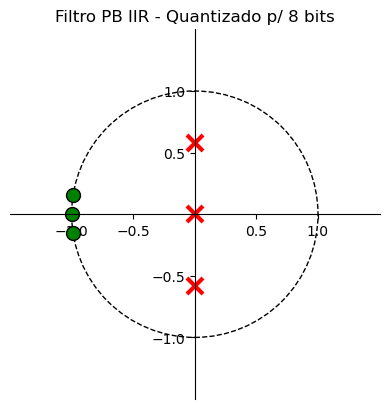

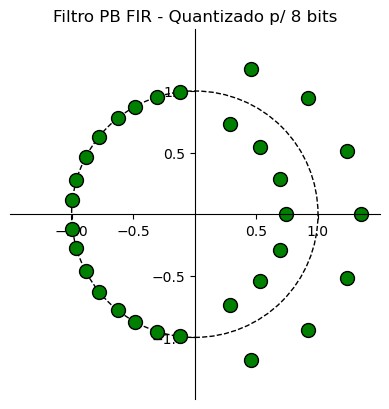

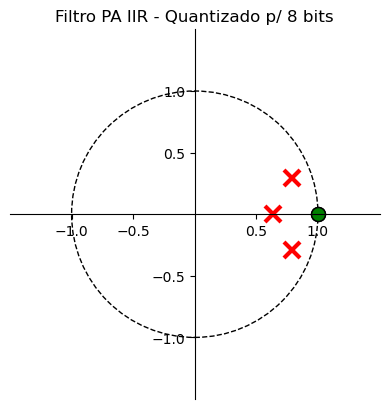

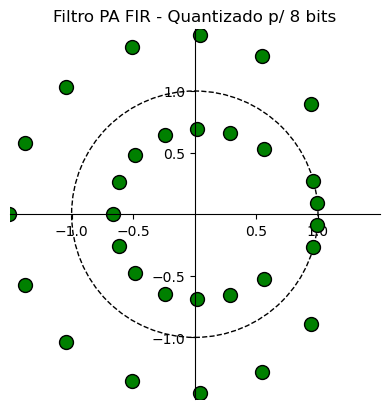

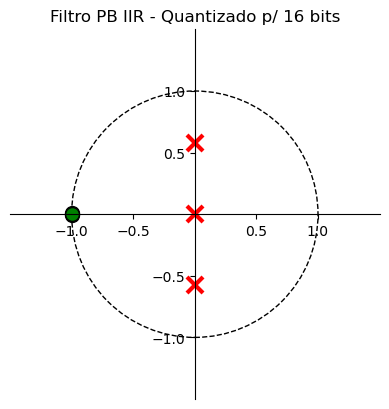

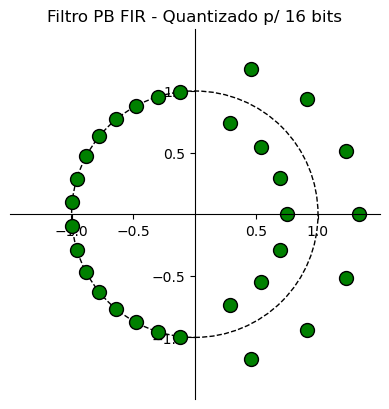

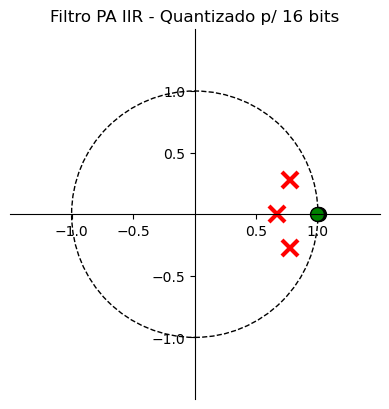

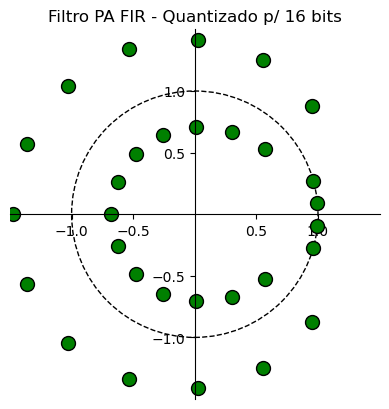

(array([-1.47836268+0.j        , -1.35999134+0.57005798j,
        -1.35999134-0.57005798j, -1.02574208+1.04349022j,
        -1.02574208-1.04349022j, -0.53437811+1.34049832j,
        -0.53437811-1.34049832j,  0.02687712+1.41190881j,
         0.02687712-1.41190881j,  0.55603368+1.24766302j,
         0.55603368-1.24766302j,  0.94771873+0.87646473j,
         0.94771873-0.87646473j,  0.99559482+0.09376006j,
         0.99559482-0.09376006j,  0.9620384 +0.27291412j,
         0.9620384 -0.27291412j,  0.56873547+0.52597523j,
         0.56873547-0.52597523j,  0.29800772+0.6686883j ,
         0.29800772-0.6686883j ,  0.01347759+0.70800448j,
         0.01347759-0.70800448j, -0.25660466+0.643698j  ,
        -0.25660466-0.643698j  , -0.676424  +0.j        ,
        -0.62541492+0.26215076j, -0.62541492-0.26215076j,
        -0.47909068+0.48738026j, -0.47909068-0.48738026j]),
 array([], dtype=float64),
 1.0)

In [15]:
# Polos e Zeros Quantizados
DSP.zplane(Q8b_PBI, Q8a_PBI, title = "Filtro PB IIR - Quantizado p/ 8 bits")
DSP.zplane(Q8b_PBF, Q8a_PBF, title = "Filtro PB FIR - Quantizado p/ 8 bits")
DSP.zplane(Q8b_PAI, Q8a_PAI, title = "Filtro PA IIR - Quantizado p/ 8 bits")
DSP.zplane(Q8b_PAF, Q8a_PAF, title = "Filtro PA FIR - Quantizado p/ 8 bits")
##
DSP.zplane(Q16b_PBI, Q16a_PBI, title = "Filtro PB IIR - Quantizado p/ 16 bits")
DSP.zplane(Q16b_PBF, Q16a_PBF, title = "Filtro PB FIR - Quantizado p/ 16 bits")
DSP.zplane(Q16b_PAI, Q16a_PAI, title = "Filtro PA IIR - Quantizado p/ 16 bits")
DSP.zplane(Q16b_PAF, Q16a_PAF, title = "Filtro PA FIR - Quantizado p/ 16 bits")

## Observações Sobre a Quantização de Coeficientes

Podemos observar que os filtros FIR não sofreram grandes alterações, seja em 8 ou seja em 16 bits, já os filtros IIR sofreram grandes alterações na localização de zeros. Enquanto os 3 zeros do sistema 64 bits se encontravam no mesmo ponto do plano z ((0, 1) e (0, -1)), ao serem quantizados para 8 bits, os zeros se separam, resultando em dois zeros conjugados

Fora isso, não há nada notável quanto as diferenças, o filtro butterworth costuma ser bem estável e ele não foi instabilizado pela quantização dos coeficientes e seus polos não sofreram grandes alterações.

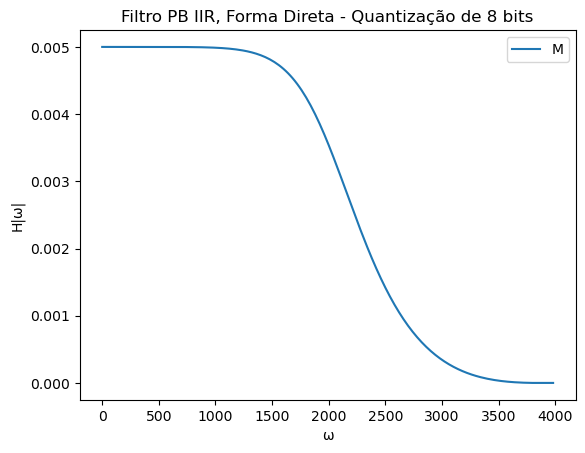

<Figure size 640x480 with 0 Axes>

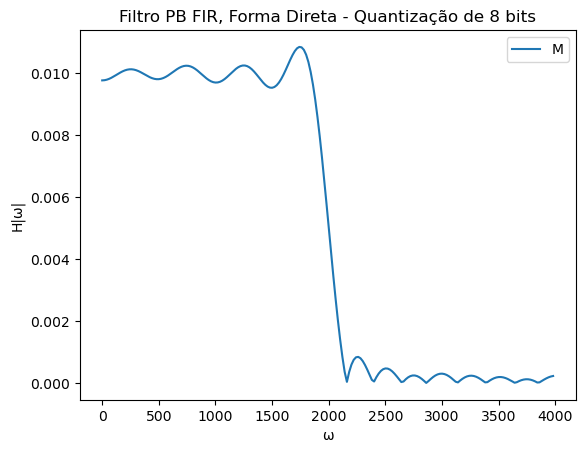

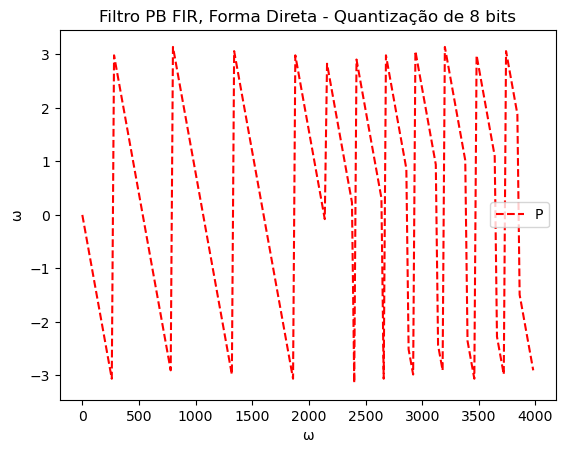

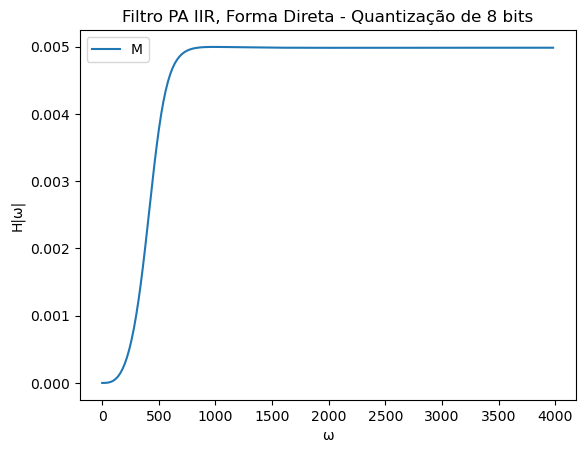

<Figure size 640x480 with 0 Axes>

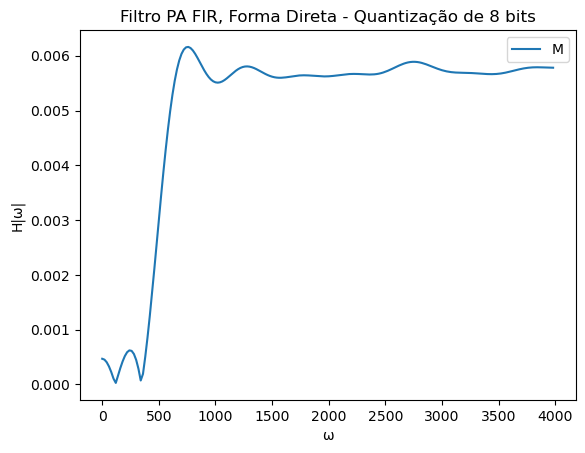

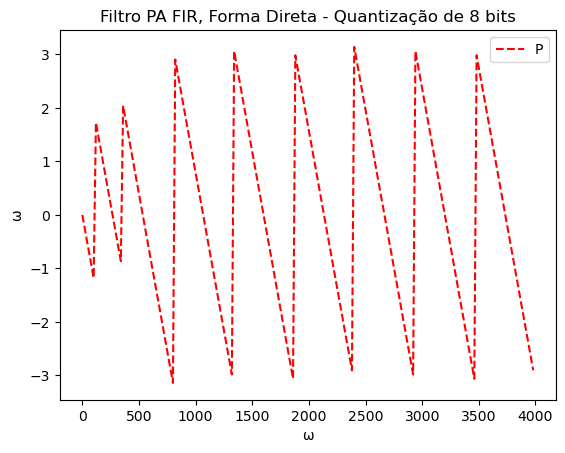

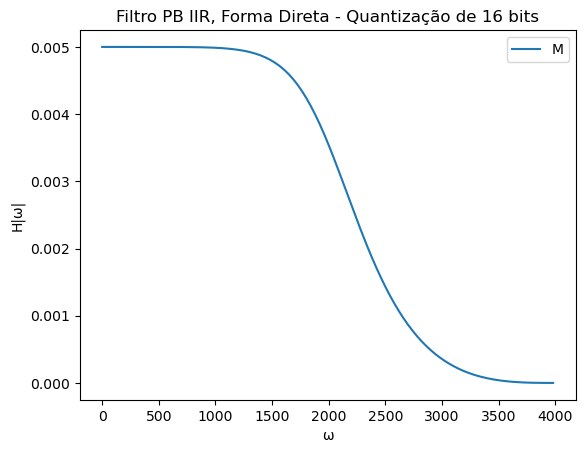

<Figure size 640x480 with 0 Axes>

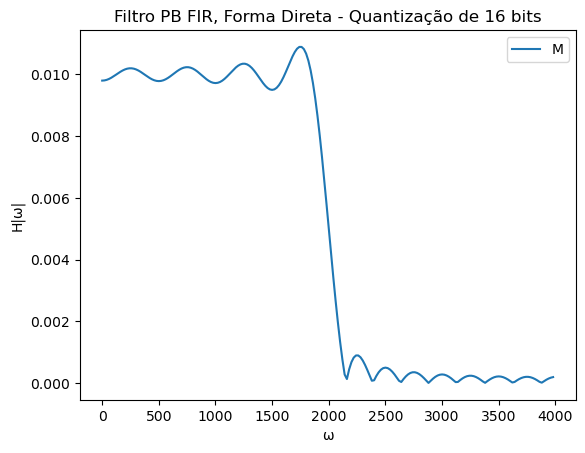

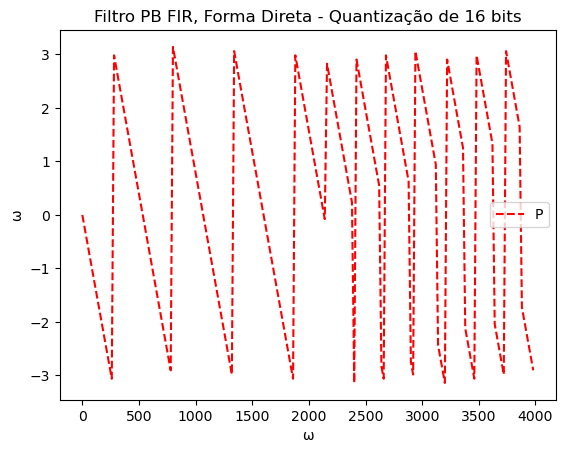

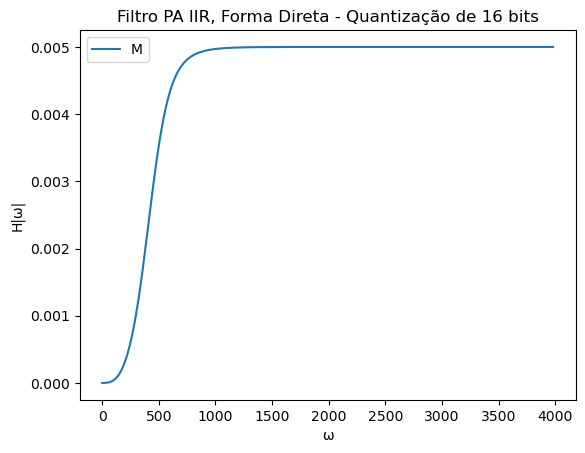

<Figure size 640x480 with 0 Axes>

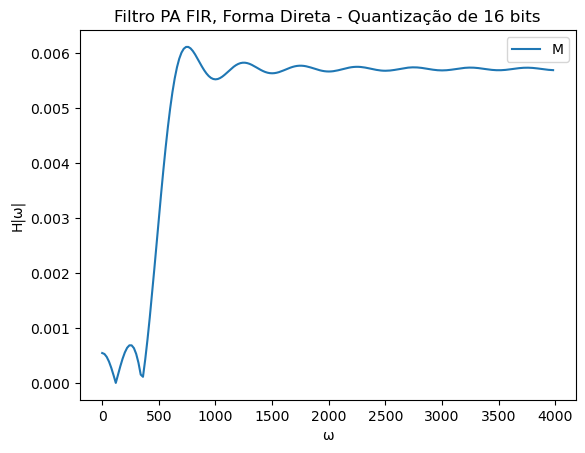

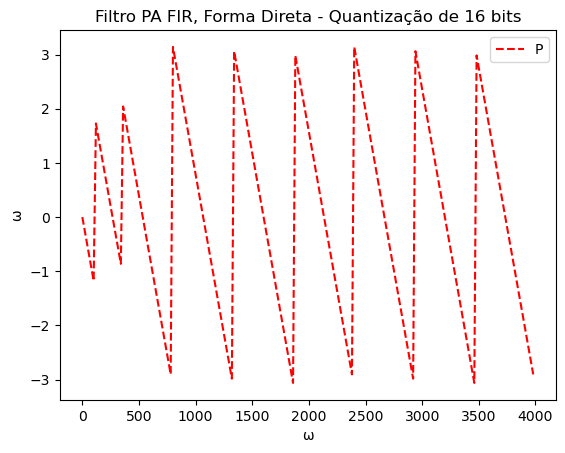

In [16]:
# Respostas em Magnitude - Forma Direta
x = np.zeros(400)
x[0] = 1
## Respostas ao Impulso
Q8h_PBI = sp.lfilter(Q8b_PBI, Q8a_PBI, x)
Q8h_PBF = sp.lfilter(Q8b_PBF, Q8a_PBF, x)
Q8h_PAI = sp.lfilter(Q8b_PAI, Q8a_PAI, x)
Q8h_PAF = sp.lfilter(Q8b_PAF, Q8a_PAF, x)
##
Q16h_PBI = sp.lfilter(Q16b_PBI, Q16a_PBI, x)
Q16h_PBF = sp.lfilter(Q16b_PBF, Q16a_PBF, x)
Q16h_PAI = sp.lfilter(Q16b_PAI, Q16a_PAI, x)
Q16h_PAF = sp.lfilter(Q16b_PAF, Q16a_PAF, x)
## Plotando FFT
DSP.plot_FFT(Q8h_PBI, T=1/fs, title= "Filtro PB IIR, Forma Direta - Quantização de 8 bits")
DSP.plot_FFT(Q8h_PBF, type="Separate", T=1/fs, title= "Filtro PB FIR, Forma Direta - Quantização de 8 bits")
DSP.plot_FFT(Q8h_PAI, T=1/fs, title= "Filtro PA IIR, Forma Direta - Quantização de 8 bits")
DSP.plot_FFT(Q8h_PAF, type="Separate", T=1/fs, title= "Filtro PA FIR, Forma Direta - Quantização de 8 bits")
##
DSP.plot_FFT(Q16h_PBI, T=1/fs, title= "Filtro PB IIR, Forma Direta - Quantização de 16 bits")
DSP.plot_FFT(Q16h_PBF, type="Separate", T=1/fs, title= "Filtro PB FIR, Forma Direta - Quantização de 16 bits")
DSP.plot_FFT(Q16h_PAI, T=1/fs, title= "Filtro PA IIR, Forma Direta - Quantização de 16 bits")
DSP.plot_FFT(Q16h_PAF, type="Separate", T=1/fs, title= "Filtro PA FIR, Forma Direta - Quantização de 16 bits")

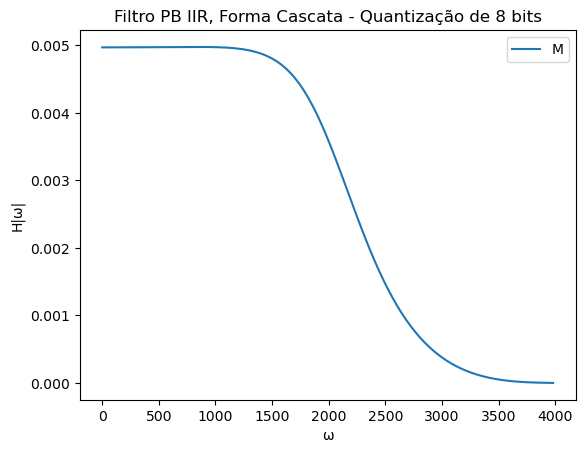

<Figure size 640x480 with 0 Axes>

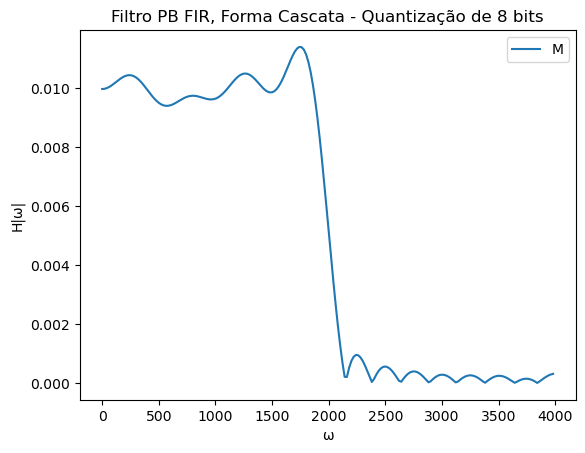

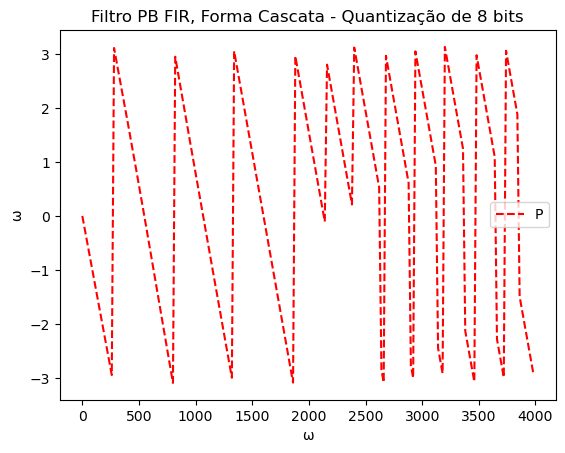

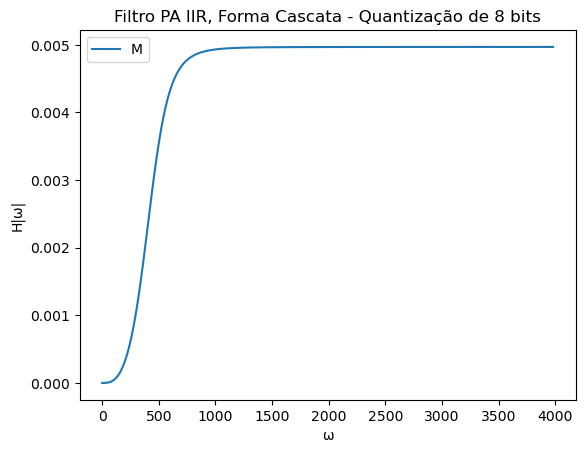

<Figure size 640x480 with 0 Axes>

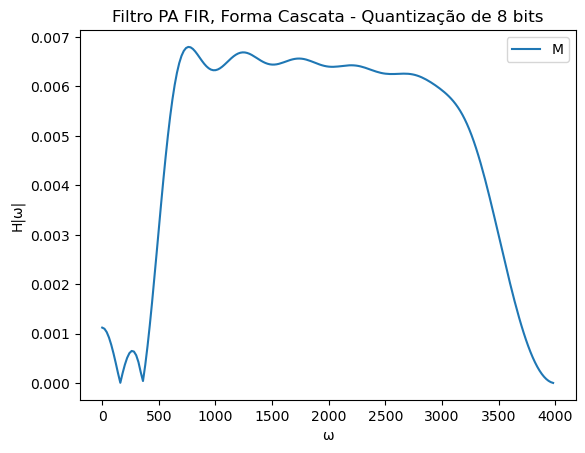

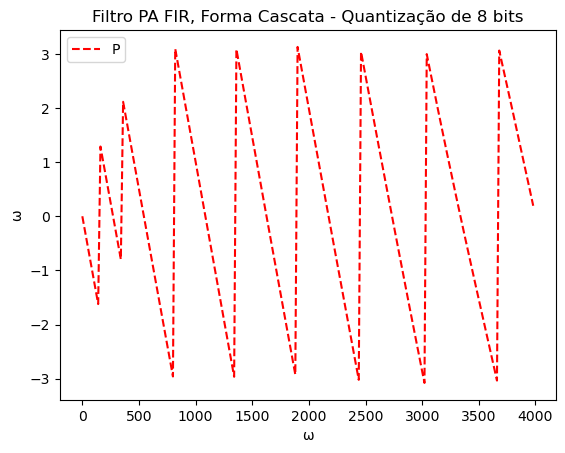

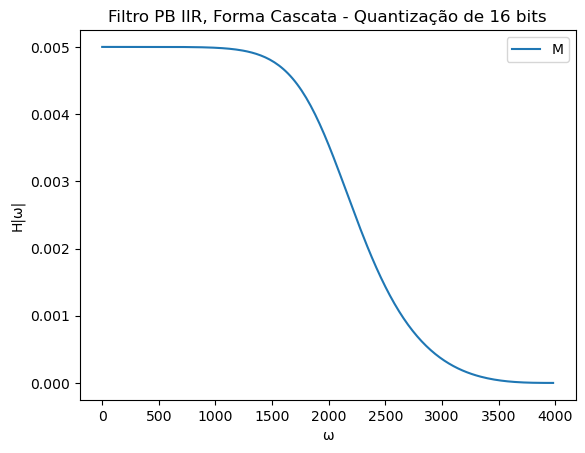

<Figure size 640x480 with 0 Axes>

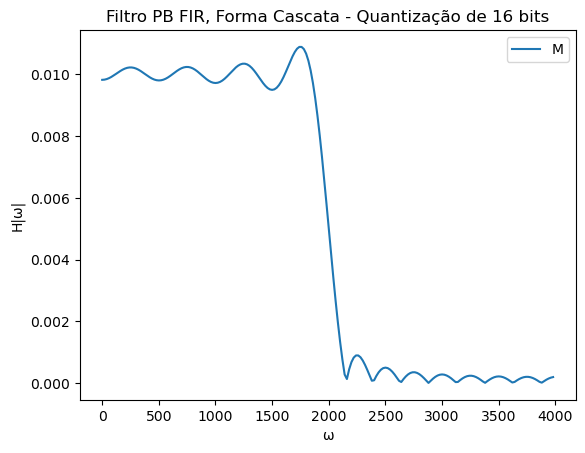

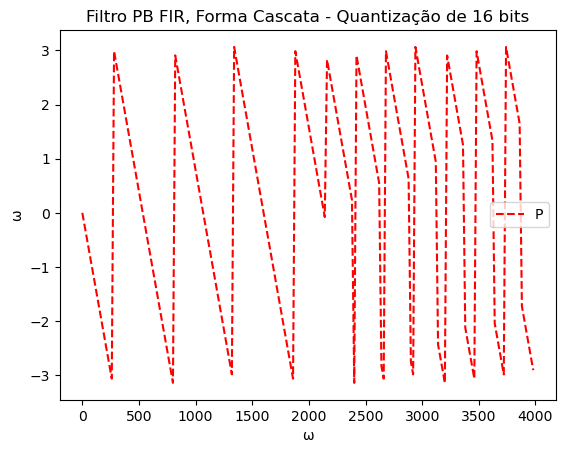

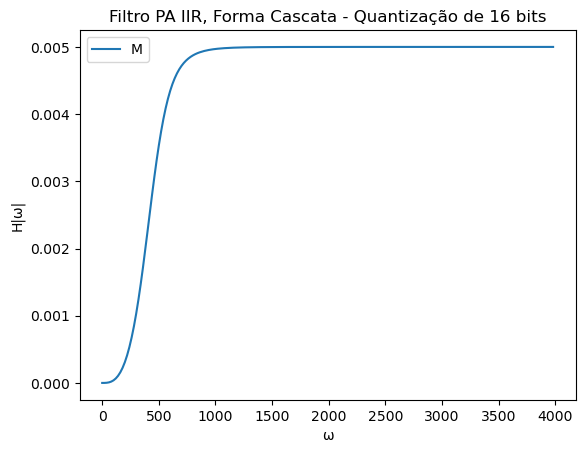

<Figure size 640x480 with 0 Axes>

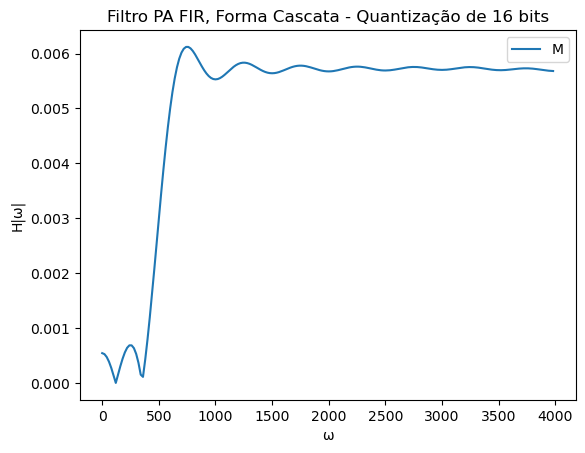

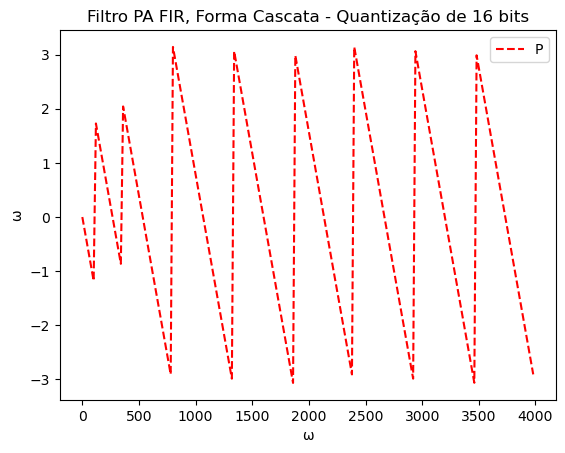

In [21]:
# Respostas em Magnitude - Forma Cascata
x = np.zeros(400)
x[0] = 1
## Respostas ao Impulso
Q8h_sos_PBI = sp.sosfilt(Q8sos_PBI, x)
Q8h_sos_PBF = sp.sosfilt(Q8sos_PBF, x)
Q8h_sos_PAI = sp.sosfilt(Q8sos_PAI, x)
Q8h_sos_PAF = sp.sosfilt(Q8sos_PAF, x)
##
Q16h_sos_PBI = sp.sosfilt(Q16sos_PBI, x)
Q16h_sos_PBF = sp.sosfilt(Q16sos_PBF, x)
Q16h_sos_PAI = sp.sosfilt(Q16sos_PAI, x)
Q16h_sos_PAF = sp.sosfilt(Q16sos_PAF, x)
## Plotando FFT
DSP.plot_FFT(Q8h_sos_PBI, T=1/fs, title= "Filtro PB IIR, Forma Cascata - Quantização de 8 bits")
DSP.plot_FFT(Q8h_sos_PBF, dB=False, type="Separate", T=1/fs, title= "Filtro PB FIR, Forma Cascata - Quantização de 8 bits")
DSP.plot_FFT(Q8h_sos_PAI, T=1/fs, title= "Filtro PA IIR, Forma Cascata - Quantização de 8 bits")
DSP.plot_FFT(Q8h_sos_PAF, type="Separate", T=1/fs, title= "Filtro PA FIR, Forma Cascata - Quantização de 8 bits")
##
DSP.plot_FFT(Q16h_sos_PBI, T=1/fs, title= "Filtro PB IIR, Forma Cascata - Quantização de 16 bits")
DSP.plot_FFT(Q16h_sos_PBF, type="Separate", T=1/fs, title= "Filtro PB FIR, Forma Cascata - Quantização de 16 bits")
DSP.plot_FFT(Q16h_sos_PAI, T=1/fs, title= "Filtro PA IIR, Forma Cascata - Quantização de 16 bits")
DSP.plot_FFT(Q16h_sos_PAF, type="Separate", T=1/fs, title= "Filtro PA FIR, Forma Cascata - Quantização de 16 bits")

## Conclusão

Os filtros IIR e os filtros com precisão de 16 bits e maior atenderam suas especificações sem problemas, mas podemos ver que os filtros FIR em cascata sofreram grandes alterações em 8 bits, apesar de permanecerem relativamente iguais em forma direta. O filtro PB FIR de 8 bits não atende as especificações devido ao ripple ser instável e alto, o que não é ideal para áudio. O filtro PA FIR de 8 bits se tornou um Passa-Faixa, ele ainda serve ao propósito dado no início, já que o amplificador é para um sinal de 2 kHz, mas não atende o design inicial do filtro. Esses dois error são oriundos da quantização de 8 bits e da estrutura de implementação do filtro.

Podemos ver que as fases dos sistemas FIR continuam lineares dentro de suas bandas de passagem independente da estrutura de implementação, então nesse caso não há motivo para implementar o sistema em cascata.

Se considerarmos quais filtros seriam implementados, podemos considerar o filtro PB FIR de 64 ou de 16 bits para o filtro de áudio e um filtro analógico IIR para o amplificador.